<a href="https://colab.research.google.com/github/ZamuDi0S/Weather-LSTM/blob/main/LSTM_weather_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install vega_datasets

In [4]:
from vega_datasets import data

# Cargar datos de clima
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
#Por si no está disponible
df = pd.read_csv('seattle-weather.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        42,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,501 (478.52 KB)

 Trainable params: 122,501 (478.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.0322
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0126
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0111
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0107
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0112
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0102
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0103
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0115
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0103
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0099
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0087
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0094
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0080
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0079
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0083
Epoc

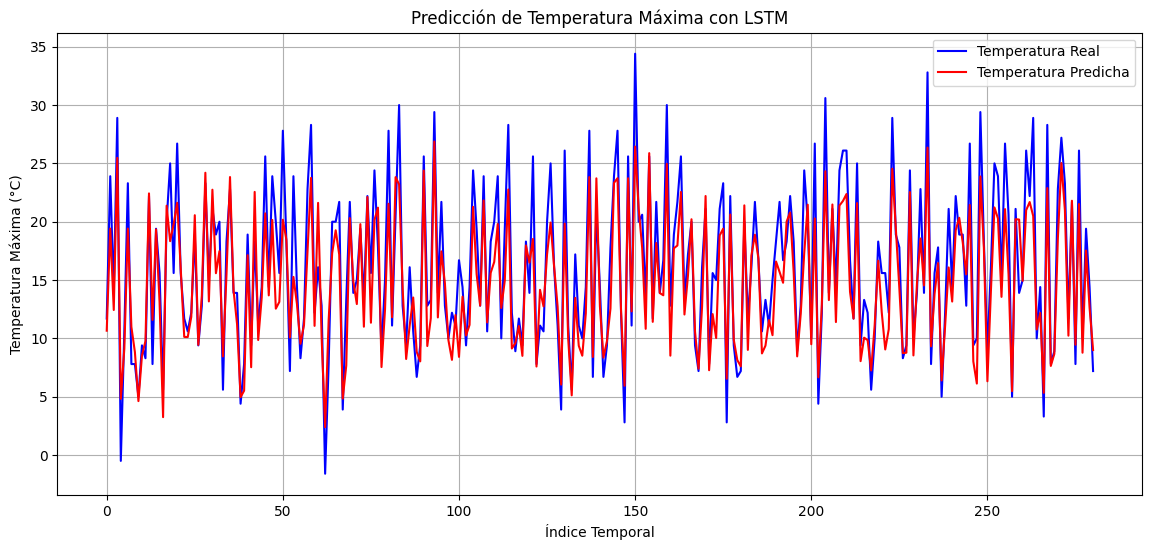

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

df = data.seattle_weather()
df = df[['date', 'temp_max', 'temp_min', 'precipitation', 'wind']].dropna()

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

#Escalar datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

#Secuencias
def create_sequences(data, look_back=60):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        Y.append(data[i+look_back, 0])  # temp_max como target
    return np.array(X), np.array(Y)

X, y = create_sequences(data_scaled)

#Dividir conjuntos
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelo LSTM
model = Sequential([
    LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(0.001), loss='mean_squared_error')
model.summary()

#Entrenamiento
model.fit(X_train, Y_train, epochs=25, batch_size=16, verbose=1)

#Preducción
predictions = model.predict(X_test)

#Invertir el escalado solo para el target (temp_max = índice 0)
def invert_scale(pred, original, feature_index):
    dummy = np.zeros((len(pred), original.shape[1]))
    dummy[:, feature_index] = pred.ravel()
    return scaler.inverse_transform(dummy)[:, feature_index]

predicted_temp = invert_scale(predictions, data_scaled, feature_index=0)
real_temp = invert_scale(Y_test.reshape(-1, 1), data_scaled, feature_index=0)

plt.figure(figsize=(14,6))
plt.plot(real_temp, label='Temperatura Real', color='blue')
plt.plot(predicted_temp, label='Temperatura Predicha', color='red')
plt.title('Predicción de Temperatura Máxima con LSTM')
plt.xlabel('Índice Temporal')
plt.ylabel('Temperatura Máxima (°C)')
plt.legend()
plt.grid(True)
plt.show()